In [2]:
import pandas as pd
df=pd.read_csv("Wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
obj=df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Alcohol , 0
Malic_Acid , 0
Ash , 0
Ash_Alcanity , 0
Magnesium , 0
Total_Phenols , 0
Flavanoids , 0
Nonflavanoid_Phenols , 0
Proanthocyanins , 0
Color_Intensity , 0
Hue , 0
OD280 , 0
Proline , 0
Customer_Segment , 0


In [6]:
import matplotlib.pyplot as plt

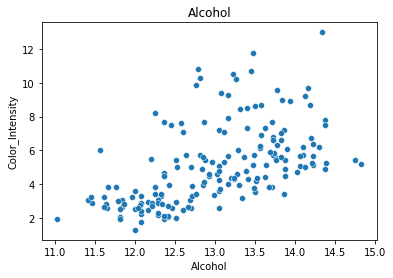

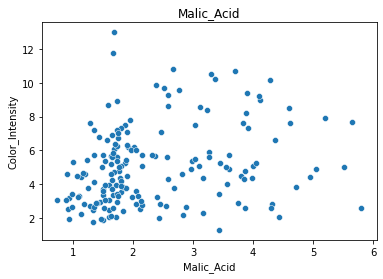

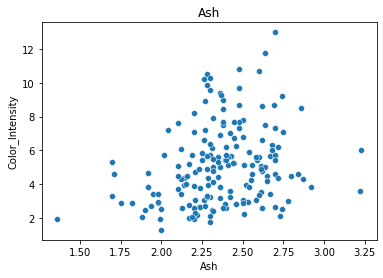

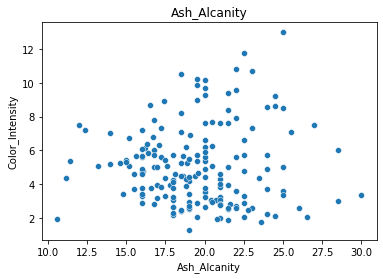

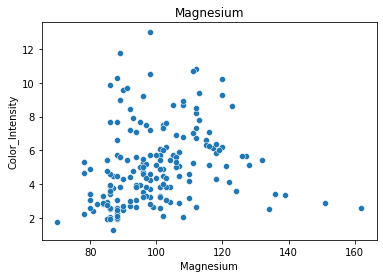

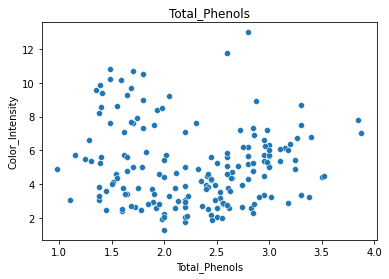

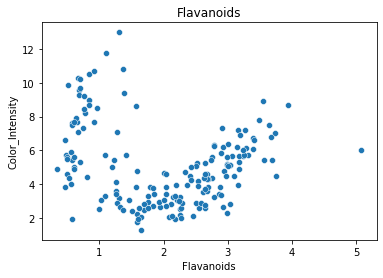

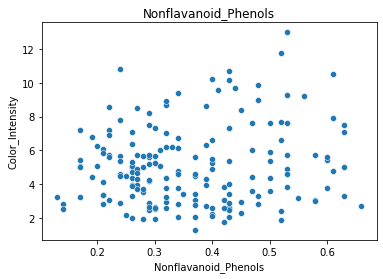

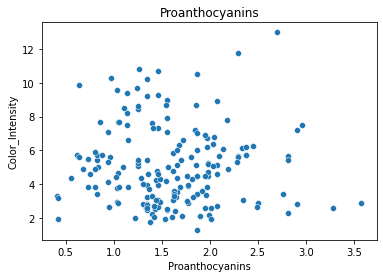

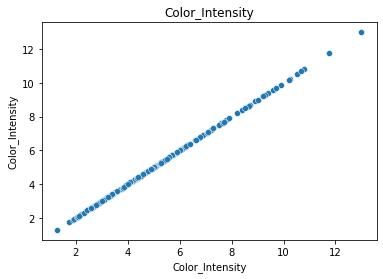

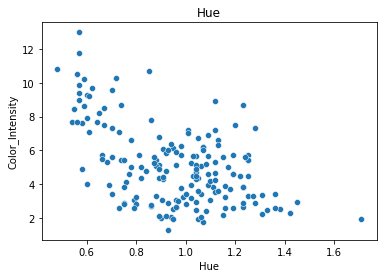

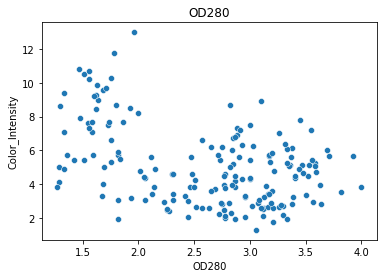

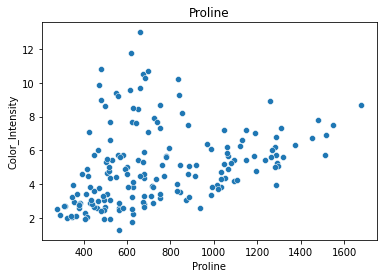

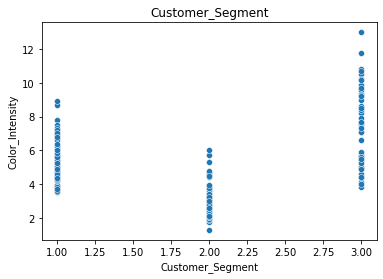

In [10]:
for features in df.columns:
    sns.scatterplot(x=features,y="Color_Intensity",data=df)
    plt.title(features)
    plt.xlabel(features)
    plt.ylabel("Color_Intensity")
    plt.show()

### cluster between Color_intensity and total_phenols

In [12]:
X=df.iloc[:,[5,9]]
X.head()

,Total_Phenols,Color_Intensity
0,2.80,5.64
1,2.65,4.38
2,2.80,5.68
3,3.85,7.80
4,2.80,4.32


In [14]:
from sklearn.cluster import KMeans

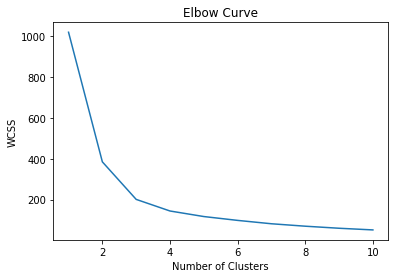

In [16]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=500,random_state=1000)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans_new=KMeans(n_clusters=4,random_state=1000,max_iter=500,init="k-means++")
pred=kmeans_new.fit(X)

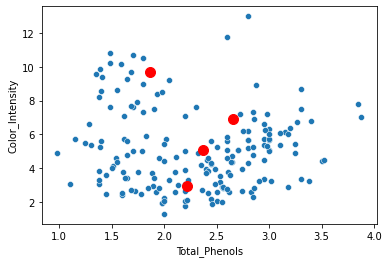

In [20]:
sns.scatterplot(x="Total_Phenols",y="Color_Intensity",data=X)
plt.scatter(kmeans_new.cluster_centers_[:,0],kmeans_new.cluster_centers_[:,1],s=100,c="red")
plt.show()